In [13]:
import sys,os
import json

meta_file = '/mnt/lustre/share_data/chenkeqin/mllm_data/pretrain_data/ann/v2_OpenEnded_mscoco_test2015_questions.jsonl'
pd_file = '/mnt/cache/fanweichen2/Code/unify_mllm/result/output/mix/vqa_new/multitest_VQAv2_test_extra_prediction.jsonl'
des_file = '/mnt/cache/fanweichen2/Code/unify_mllm/result/output/mix/vqa_new/vqa2_v2_test.json'
id_list = []
with open(meta_file,'r') as r:
    for line in r.readlines():
        info = json.loads(line)
        question_id = info['question_id']
        id_list.append(question_id)
print(id_list)
print(len(id_list))


[262144000, 262144001, 262144002, 262144003, 262144004, 262144005, 1000, 1001, 1002, 524292000, 524292001, 524292002, 524292003, 524292004, 131079000, 131079001, 131079002, 131083000, 131083001, 131083002, 131083003, 131083004, 131083005, 131083006, 131083007, 131083008, 131083009, 131083010, 131083011, 131083012, 131083013, 131083014, 524301000, 524301001, 524301002, 14000, 14001, 14002, 377092000, 377092001, 377092002, 16000, 16001, 16002, 16003, 16004, 16005, 16006, 16007, 131090000, 131090001, 131090002, 131090003, 131090004, 131090005, 131090006, 131090007, 131090008, 131090009, 131091000, 131091001, 131091002, 262164000, 262164001, 262164002, 262164003, 262164004, 393238000, 393238001, 393238002, 393238003, 393238004, 393238005, 393238006, 393238007, 393238008, 393238009, 393239000, 393239001, 393239002, 131096000, 131096001, 131096002, 131096003, 131096004, 131096005, 262169000, 262169001, 262169002, 262169003, 262169004, 262169005, 262169006, 262169007, 27000, 27001, 27002, 270

In [14]:
final = []
cnt = 0
bad_id = []
with open(des_file,'w') as w:
    with open(pd_file,'r') as r:
        for line in r.readlines():
            info = json.loads(line)
            pd_item = info['pred'].lower()
            try:
                res = {"answer": pd_item.split("the answer is ")[1].split('.')[0], "question_id": int(id_list[cnt])}
            except:
                
                try:
                    res = {"answer": pd_item.split("the answer ")[1].split('is')[1].split('.')[0], "question_id": int(id_list[cnt])}
                    print('**',pd_item.split("the answer ")[1].split('is')[1].split('.')[0])
                except:
                    print(pd_item)
                    bad_id.append(cnt)
                    res = {"answer": pd_item, "question_id": int(id_list[cnt])}
            final.append(res)
            cnt += 1
    w.write(json.dumps(final))


 the two giraffes are standing near each other.
** ares
** hs
** hin company
** tdc
** ella
** td
** hauspad
** ffe
** objavd
** objavd
** objavd
** objavd
** objavd
** objavd
** ronon
** db
** elles
** ct
** zuki wallcom
** zulette
** zulette
** qt
** q
 the two giraffes are standing near each other.
** ash
** appelloni
** appelloni
** shell
** vilier street
** ajj
** ji
** td comfort zone
** td comfort zone
** dw
** itt land


In [15]:
cnt = 0
with open(pd_file,'r') as r:
    for line in r.readlines():
        info = json.loads(line)
        if cnt in bad_id:
            print(info)
        cnt += 1

{'pred': ' The two giraffes are standing near each other.', 'target': " A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions. USER: Can you give me a straightforward answer to my question: Are the giraffes eating? Consider the image <im_start> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_patch> <im_pa

In [1]:
import sys,os
import json
from tqdm import tqdm
img_dict = {}
#/mnt/cache/fanweichen2/Code/unify_mllm/vg_data/region_descriptions.json
with open('/mnt/lustre/share_data/chenkeqin/mllm_data/pretrain_data/ann/GC_genome196_train.jsonl','r') as r:
    for line in tqdm(r.readlines()):
        info = json.loads(line)
        if info['img_path'] not in img_dict.keys():
            img_dict[info['img_path']] = [[info['expression']],[info['bbox']]]
        else:
            img_dict[info['img_path']].append([[info['expression']],[info['bbox']]])
            
print('len: ',len(img_dict.keys()))

100%|██████████| 3602760/3602760 [00:30<00:00, 116262.82it/s]


len:  86417


In [3]:
k = list(img_dict.keys())
#print(img_dict[k[0]])
print(k[0])

zz1424:s3://publicdataset_8/Visual_Genome_Dataset_V1.2/unzip/data/images/VG_100K/4.jpg


In [2]:
import sys,os,json

with open('/mnt/lustre/fanweichen2/Research/MLLM/vg_data/region_descriptions.json','r') as r:
    info = json.load(r)

In [7]:
print(info[100].keys())
print(info[100]['id'])
print(info[100])

dict_keys(['regions', 'id'])
101
{'regions': [{'region_id': 4933846, 'width': 85, 'height': 145, 'image_id': 101, 'phrase': 'A person putting something in the trunk of the car.', 'y': 326, 'x': 368}, {'region_id': 4933847, 'width': 45, 'height': 150, 'image_id': 101, 'phrase': 'A parking sign on a pole on the sidewalk.', 'y': 282, 'x': 486}, {'region_id': 4933849, 'width': 105, 'height': 109, 'image_id': 101, 'phrase': 'A mini van parked on the side of the road.', 'y': 334, 'x': 2}, {'region_id': 4933850, 'width': 57, 'height': 72, 'image_id': 101, 'phrase': 'A blue car parked on the side of the road.', 'y': 389, 'x': 742}, {'region_id': 4933851, 'width': 419, 'height': 275, 'image_id': 101, 'phrase': 'Trees by the front of the building.', 'y': 91, 'x': 380}, {'region_id': 4933852, 'width': 795, 'height': 122, 'image_id': 101, 'phrase': 'The road lines are yellow.', 'y': 477, 'x': 2}, {'region_id': 4933853, 'width': 40, 'height': 116, 'image_id': 101, 'phrase': 'A person wearing a whit

In [17]:
from tqdm import tqdm
import sys,os,json
final = {}

def cal_iou(boxA, boxB):
    boxA = [int(x) for x in boxA]
    boxB = [int(x) for x in boxB]

    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    
    iou = interArea / float(boxAArea + boxBArea - interArea)
    iou_selfA = interArea / float(boxAArea)
    iou_selfB = interArea / float(boxBArea)
    return iou,iou_selfA,iou_selfB

IOU_THRESH = 0.35
for item in info:
    image_id = item['id']
    final[image_id] = []
    for i in range(len(item['regions'])):
        w = item['regions'][i]['width']
        h = item['regions'][i]['height']
        x = item['regions'][i]['x']
        y = item['regions'][i]['y']
        phrase = item['regions'][i]['phrase']
        box = [x,y,x+w,y+h]
        mark = False
        for idx, sub_item in enumerate(final[image_id]):
            p_box = sub_item[1]
            iou,iou_selfA,iou_selfB = cal_iou(box,p_box)
            if iou>IOU_THRESH:
                if iou_selfA > iou_selfB:
                    mark = True
                    break
                elif iou_selfB > iou_selfA:
                    final[image_id].pop(idx)
                else:
                    mark = True
                    break
        if mark:
            continue
        final[image_id].append([[phrase],box])

In [35]:
def bb_intersection_over_union(boxA, boxB):
    boxA = [int(x) for x in boxA]
    boxB = [int(x) for x in boxB]

    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    
    iou = interArea / float(boxAArea + boxBArea - interArea)

    return iou

a = [70, 174, 365, 345]
b = [196, 220, 323, 344]
print(bb_intersection_over_union(a,b))


0.3142677561282212


In [24]:
with open('/mnt/lustre/fanweichen2/Research/MLLM/scripts/benchmark/vg.json','w') as w:
    w.write(json.dumps(final))

In [18]:
len(final[4])

44

In [19]:
str(final[4])

"[[['Plush gray carpet on the floor.'], [119, 396, 260, 478]], [['curtains are blue in colour'], [429, 36, 601, 121]], [['floor is wooden made'], [382, 360, 429, 393]], [['sun is bright ouside'], [495, 85, 581, 163]], [['a wooden stand is at the coner'], [2, 347, 106, 478]], [['the floor is clean'], [428, 365, 534, 397]], [['empty flower box on the porch'], [458, 157, 528, 201]], [['a white wire is on the floor'], [21, 331, 117, 406]], [['the house has a carpet'], [159, 390, 209, 460]], [['building behind is white'], [497, 2, 548, 90]], [['wall is painted white'], [54, 148, 159, 196]], [['floor is wooden '], [527, 390, 570, 418]], [['sliding glass patio door'], [363, 2, 639, 334]], [['the house is clean'], [156, 324, 408, 411]], [['Chair with circular seat'], [371, 197, 484, 398]], [['the floor is wooden'], [509, 397, 554, 424]], [['the walls are white'], [64, 89, 205, 162]], [['curtains are blue in colour'], [410, 34, 447, 100]], [['white cables on the floor'], [63, 362, 144, 414]], [

In [12]:
print(type(info[0]))

<class 'dict'>


In [ ]:
info[4]['regions']

In [11]:
len(info[0])

2

In [7]:
info[0].keys()

dict_keys(['regions', 'id'])

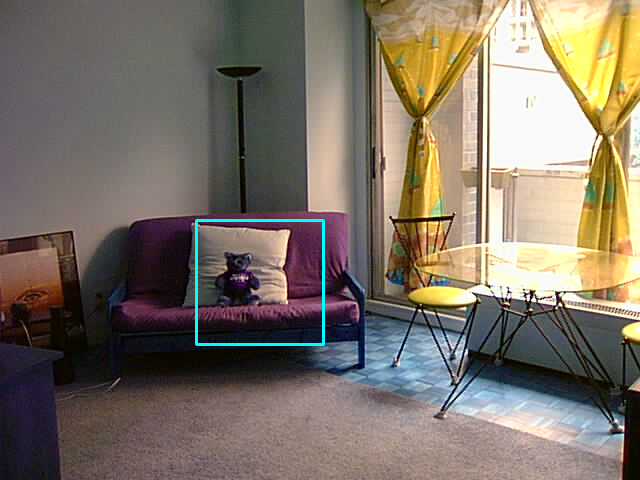

In [8]:
from PIL import Image
import cv2 as cv 

bbox = [196, 220, 323, 344]

img = cv.imread('/mnt/cache/fanweichen2/Code/unify_mllm/4.jpg')
cv.rectangle(img, tuple(bbox[:2]), tuple(bbox[2:]), (0,255,255),2)

img_ivew = Image.fromarray(img)
display(img_ivew)
